# Run a ML simulation

In [1]:
#%load_ext autoreload
#%autoreload 

In [2]:
#from IPython.core.display import HTML
#HTML("<script>Jupyter.notebook.kernel.restart()</script>")

## Running models with SSH data

In [4]:
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
### YOU MAY NEED TO CHANGE THE CSV FILENAME!!!
csv_name = "first_and_second_neighbours.csv"          
model = RandomForestClassifier(n_estimators=50,criterion="entropy",n_jobs=-1)
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!!!
allowed_windings = [-1,0,1,2]
epsilon = 0.01
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!!!
val_split = 0.5  
########## YOU  MAY NEED TO CHANGE THE SIMULATION NAME!!! 
simulation_name = "first_and_second_neighbours"  
#simulation_name = "test-SSH"
########## YOU MAY NEED TO CHANGE THE SEED!!!!!
random_state = 137                    

dict_args = {"csv_name": csv_name, "model": model, "allowed_windings": allowed_windings, "val_split": val_split, \
             "simulation_name": simulation_name, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat100
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.130965,0.301130,...,-0.080279,-0.115687,-0.174988,0.245064,0.319763,-0.059082,-0.000556,-0.245133,-0.301130,0.130965
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.130965,-0.301130,...,-0.080279,0.115687,-0.174988,-0.245064,0.319763,0.059082,-0.000556,0.245133,-0.301130,-0.130965
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.148414,-0.042467,...,0.185442,-0.080620,-0.066211,-0.121339,-0.151700,0.192513,0.191642,-0.050956,-0.042467,-0.148414
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.069630,-0.026147,...,0.102009,-0.100671,-0.081002,-0.020715,-0.058717,0.115834,0.118274,-0.054666,-0.026147,-0.069630
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.010206,-0.014625,...,0.047555,-0.041368,-0.018852,-0.017673,-0.023377,0.031447,0.010280,0.000925,0.014625,-0.010206


#### Unque winding values

In [6]:
np.unique(simulation.dataframe.phase.values)

array([ -1,   0,   1,   2, 999], dtype=int32)

#### Checking initialization

In [7]:
n_features = simulation.n_features
n_hamiltonians = simulation.n_hamiltonians
n_ts = simulation.n_ts

print("n_features: ", n_features)
print("n_hamiltonians: ", n_hamiltonians)
print("n_ts: ", n_ts)

n_features:  100
n_hamiltonians:  6561
n_ts:  2


In [8]:
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.8414875781130925
% val:  0.0
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  5521
number of val hamiltonians:  0
number of test hamiltonians:  1040
total number of hamiltonians:  6561


train ids:  [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 

## Running a simulation

In [9]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
pred_params = None
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False   
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments = n_experiments, start_n = start_n, fit_params = fit_params, \
                          pred_params=pred_params, store_in_lists=store_in_lists, save_eigenvector=save_eigenvector, \
                          save_hamiltonian=save_hamiltonian, save_accuracy=save_accuracy, save_model=save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [2:20:46<00:00, 87.97s/it] 


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,-0.130965,0.301130,...,-0.080279,-0.115687,-0.174988,0.245064,0.319763,-0.059082,-0.000556,-0.245133,-0.301130,0.130965
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,-0.130965,-0.301130,...,-0.080279,0.115687,-0.174988,-0.245064,0.319763,0.059082,-0.000556,0.245133,-0.301130,-0.130965
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,-0.148414,-0.042467,...,0.185442,-0.080620,-0.066211,-0.121339,-0.151700,0.192513,0.191642,-0.050956,-0.042467,-0.148414
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.069630,-0.026147,...,0.102009,-0.100671,-0.081002,-0.020715,-0.058717,0.115834,0.118274,-0.054666,-0.026147,-0.069630
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,2,test,0.010206,-0.014625,...,0.047555,-0.041368,-0.018852,-0.017673,-0.023377,0.031447,0.010280,0.000925,0.014625,-0.010206
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.116962,0.021475,...,-0.086901,-0.045676,-0.028034,0.129266,0.130083,-0.098190,-0.104188,-0.007911,0.021475,0.116962
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.037175,-0.095882,...,-0.027490,0.046168,0.063419,-0.041630,-0.085769,-0.010604,-0.009822,0.084024,0.095882,-0.037175
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.027709,-0.038180,...,0.123344,-0.114320,-0.057118,-0.040291,-0.061263,0.087153,0.029599,-0.001276,0.038180,-0.027709
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.059795,0.030272,...,-0.082347,0.140996,0.128386,-0.036608,0.029628,-0.124877,-0.140478,0.088573,0.030272,0.059795
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.141605,0.013497,...,-0.035718,-0.110014,-0.082452,0.146084,0.152588,-0.067575,-0.087187,-0.043484,0.013497,0.141605


#### Viewing a random sample

In [10]:
simulation.dataframe.sample(frac=0.1, replace=False)

,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
222054,2220,H_-0.65_-0.35_-0.00849714.dat,-0.65,-0.35,-0.008497,0,0,val,0.076973,-0.086849,...,-0.104655,0.013985,-0.147687,0.141838,-0.024612,0.111295,0.087928,-0.033797,0.086849,-0.076973
209519,2095,H_-0.75_1.5_0.000602552.dat,-0.75,1.50,0.000603,0,0,val,-0.041551,0.093132,...,-0.116361,-0.030411,0.063859,0.152433,0.085638,-0.053865,-0.111916,-0.127463,-0.093132,0.041551
536605,5366,H_1.3_-1_1.0008.dat,1.30,-1.00,1.000802,1,1,train,-0.334671,0.424167,...,-0.150368,-0.040455,0.251731,0.014213,-0.107008,0.078666,-0.206950,-0.043089,0.424167,-0.334671
615988,6159,H_1.8_-1.85_1.00086.dat,1.80,-1.85,1.000862,1,1,train,-0.109298,0.081713,...,-0.015679,0.009216,-0.063568,0.171706,-0.015280,0.051607,-0.051426,0.034857,-0.081713,0.109298
111377,1113,H_-1.35_1_-0.000161532.dat,-1.35,1.00,-0.000162,0,0,train,-0.089907,0.033181,...,-0.097913,0.119124,-0.105151,0.070694,-0.166347,0.125396,-0.094875,0.167094,-0.033181,0.089907
105495,1054,H_-1.35_-1.95_2.0113.dat,-1.35,-1.95,2.011300,2,2,test,-0.011208,-0.066231,...,-0.000967,-0.051117,-0.044556,0.073887,0.024063,-0.054003,-0.042479,0.029195,0.066231,0.011208
279335,2793,H_-0.3_-0.05_-0.00607415.dat,-0.30,-0.05,-0.006074,0,0,val,-0.005999,0.112798,...,0.080376,-0.141848,-0.140875,0.053459,0.038847,0.097001,0.104443,-0.130041,-0.112798,0.005999
161891,1618,H_-1.05_1.95_0.000667909.dat,-1.05,1.95,0.000668,0,0,val,-0.008347,0.004246,...,0.032827,-0.046353,-0.038583,0.030406,0.009436,-0.013953,-0.006482,0.025696,0.004246,-0.008347
390900,3909,H_0.4_-0.95_1.00201.dat,0.40,-0.95,1.002009,1,1,val,0.368952,-0.420147,...,0.035751,-0.015736,-0.092364,0.093220,-0.359560,0.169093,0.080560,0.008645,0.420147,-0.368952
182700,1827,H_-0.9_0.25_-0.00132037.dat,-0.90,0.25,-0.001320,0,0,train,-0.252197,-0.239023,...,0.072255,0.140223,-0.122052,-0.217304,0.180587,0.295187,-0.251963,-0.308464,0.239023,0.252197


#### Checking train/val/test splits again

In [11]:
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.4208199969516842
% val:  0.42066758116140834
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  2761
number of val hamiltonians:  2760
number of test hamiltonians:  1040
total number of hamiltonians:  6561


train ids:  [1282, 2316, 3930, 2265, 6532, 6503, 3336, 6535, 2528, 2392, 1784, 2241, 2717, 691, 4939, 3617, 4128, 5713, 1751, 3701, 4499, 1993, 6261, 265, 1623, 605, 4302, 2410, 484, 4647, 1294, 4892, 3559, 5258, 5521, 1624, 4789, 1242, 622, 5895, 4445, 546, 450, 1345, 4382, 3927, 2682, 4219, 6488, 6373, 6494, 4886, 5440, 5750, 3055, 3994, 4611, 2744, 4527, 1663, 1278, 2853, 551, 3818, 1425, 552, 4357, 3981, 2972, 48, 2083, 4929, 2384, 2735, 3820, 6272, 510, 3653, 3718, 6081, 5056, 2761, 1698, 2635, 6303, 6044, 283, 5225, 2428, 1103, 57, 2710, 4554, 1648, 2066, 3252, 2067, 606, 6103, 3723, 6540, 4234, 4955, 69, 314, 704, 238, 5638, 4082, 2224, 3254, 281, 3744, 432, 3017, 4472, 5135, 356, 4625, 2107, 6502, 4289, 4878, 47, 1094, 4909,

#### Checking summaries

In [12]:
ham_summary = simulation.hamiltonian_summary
ham_summary

,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.16,0.50,0.29,0.05,999,0
1,-2.0,-1.95,test,0.17,0.54,0.23,0.06,-1,0
2,-2.0,-1.90,test,0.18,0.47,0.26,0.09,-1,0
3,-2.0,-1.85,test,0.23,0.42,0.27,0.08,-1,0
4,-2.0,-1.80,test,0.19,0.46,0.28,0.07,-1,0
5,-2.0,-1.75,test,0.20,0.41,0.34,0.05,-1,0
6,-2.0,-1.70,test,0.21,0.39,0.33,0.07,-1,0
7,-2.0,-1.65,test,0.25,0.43,0.27,0.05,-1,0
8,-2.0,-1.60,test,0.29,0.34,0.34,0.03,-1,1


In [13]:
len(ham_summary)

6561

In [14]:
eigen_summary = simulation.eigenvector_summary
eigen_summary

,id,phase,pred_phase,type_of
0,0,999,-1,test
1,0,999,-1,test
2,0,999,-1,test
3,0,999,1,test
4,0,999,2,test
5,0,999,1,test
6,0,999,0,test
7,0,999,0,test
8,0,999,1,test
9,0,999,1,test


In [15]:
len(eigen_summary)

656100

In [16]:
simulation.accuracy

{'eigenvector_train': 0.9997392249185078,
 'eigenvector_val': 0.9751485507246377,
 'eigenvector_test': 0.6842025611175786,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9971014492753624,
 'hamiltonian_test': 0.8870779976717112}

In [17]:
ham_summary_list = simulation.hamiltonian_summary_list
ham_summary_list

[]

In [18]:
eigen_summary_list = simulation.eigenvector_summary_list
eigen_summary_list

[]

In [19]:
accuracy_list = simulation.accuracy_list
accuracy_list

{'eigenvector_train': [],
 'eigenvector_val': [],
 'eigenvector_test': [],
 'hamiltonian_train': [],
 'hamiltonian_val': [],
 'hamiltonian_test': []}

#### Visualizing train/val/test splits

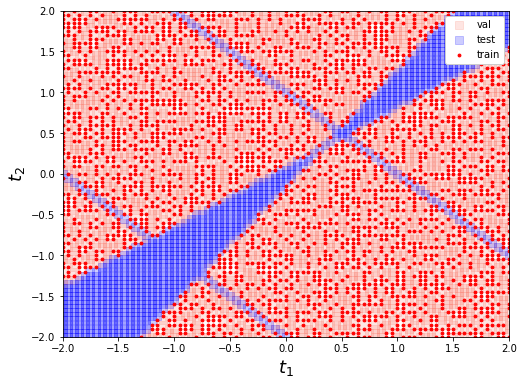

In [20]:
fig_params={"figsize": (8,6)} 
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
train_params={"marker": "o", "s": 8, "color": "red", "label": "train"}
legend_params={"framealpha": 1}
xlabel_params={"xlabel": "$t_1$", "fontsize": 18}
ylabel_params={"ylabel": "$t_2$", "fontsize": 18}
title_params={}
savefig_params = {"fname": "./simulation/test"}
simulation.visualize_scatter_2d(fig_params = fig_params, val_params = val_params, test_params = test_params,\
                                train_params = train_params, legend_params = legend_params, \
                                xlabel_params = xlabel_params, ylabel_params = ylabel_params, title_params = title_params,\
                               savefig_params = savefig_params)

## Decision Trees

In [8]:
tree_clf = DecisionTreeClf()
tree_clf.eigen_fit(train_dataframe)
tree_clf.eigen_predict(train_dataframe)
train_dataframe

,hamiltonian_number,hamiltonian_path,t_values,phase,pred_phase,feat_0,feat_1,feat_2,feat_3,feat_4,...,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99
39453,394,H_1.5_-0.1_0.000167196.dat,"(1.5, -0.1)",0,0,0.129505,0.127043,0.071374,0.066261,-0.014019,...,-0.129505,-0.127043,-0.071374,-0.066261,0.014019,0.019831,0.094058,0.098348,0.138169,0.139299
83875,838,H_-0.9_-0.7_-0.00920335.dat,"(-0.9, -0.7)",0,0,0.006005,0.084683,0.140638,-0.118358,-0.023667,...,-0.136234,0.081552,-0.029322,0.110190,0.139916,-0.095390,0.011751,-0.098211,-0.141392,0.107723
41444,414,H_0.2_0.9_1.00344.dat,"(0.2, 0.9)",1,1,0.141421,0.138435,0.136978,0.141275,0.123928,...,0.043702,0.015283,0.075777,0.049767,0.103092,0.081124,0.123928,0.107383,0.136978,0.126896
15849,158,H_0_0.7_1.00268.dat,"(0, 0.7)",1,1,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
39746,397,H_-0.5_-1.7_1.00379.dat,"(-0.5, -1.7)",1,1,0.004590,-0.109346,0.079368,0.035748,-0.133010,...,0.004590,-0.109346,0.079368,0.035748,-0.133010,0.051506,0.135847,-0.119085,-0.086795,0.141178
85169,851,H_-0.6_1.2_1.00178.dat,"(-0.6, 1.2)",1,1,-0.139943,-0.061874,-0.046256,0.113321,0.122608,...,-0.101229,-0.124805,-0.115975,0.041948,0.057765,0.140525,0.137624,0.010716,-0.006189,-0.136509
67513,675,H_1.2_0.1_-0.000243141.dat,"(1.2, 0.1)",0,0,-0.100000,-0.100000,0.100000,0.100000,-0.100000,...,0.100000,0.100000,-0.100000,-0.100000,0.100000,0.100000,-0.100000,-0.100000,0.100000,0.100000
27962,279,H_1.3_0.1_-0.000222882.dat,"(1.3, 0.1)",0,0,0.141421,0.141196,0.090143,0.096146,-0.026503,...,-0.043705,-0.036048,-0.131491,-0.128346,-0.123927,-0.127573,-0.026496,-0.034291,0.090148,0.083858
94454,944,H_-0.3_1.1_1.0021.dat,"(-0.3, 1.1)",1,1,0.002483,-0.121918,0.133712,-0.030483,-0.085121,...,-0.002483,0.121918,-0.133712,0.030483,0.085121,-0.140758,0.081104,0.056510,-0.135246,0.105832
22433,224,H_-0.4_0.7_1.0017.dat,"(-0.4, 0.7)",1,1,-0.003956,-0.092064,0.129596,-0.057935,-0.106403,...,0.086293,0.011383,-0.138121,0.122700,0.031325,-0.115869,0.111446,-0.024031,-0.126228,0.136333


In [9]:
vote_counts_tree_clf = tree_clf.majority_vote(train_dataframe)
vote_counts_tree_clf

pred_phase,0,1,elected,true
hamiltonian_number,,,,
0,0.00,1.00,1,1
2,0.00,1.00,1,1
3,0.98,0.02,0,0
4,0.99,0.01,0,0
5,0.04,0.96,1,1
6,0.03,0.97,1,1
7,0.02,0.98,1,1
8,0.04,0.96,1,1
9,0.98,0.02,0,0


In [10]:
np.mean(vote_counts_tree_clf.elected == vote_counts_tree_clf.true)

1.0

In [12]:
x = np.arange(4)
y = np.arange(5)
xx,yy = np.meshgrid(x,y)

In [13]:
xx

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [14]:
yy

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4]])

In [16]:
xx.ravel()

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])

In [17]:
yy.ravel()

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])

In [15]:
np.c_[xx.ravel(), yy.ravel()]

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [0, 3],
       [1, 3],
       [2, 3],
       [3, 3],
       [0, 4],
       [1, 4],
       [2, 4],
       [3, 4]])

In [17]:
dic = {"tuples": [(0,0), (0,1), (1,1), (2,2)], "ints": [10,20,30,40]}
df = pd.DataFrame(dic)
df

,tuples,ints
0,"(0, 0)",10
1,"(0, 1)",20
2,"(1, 1)",30
3,"(2, 2)",40


In [19]:
df[df.tuples == (0,1)].ints.values[0]

20

In [32]:
np.inf - np.rint(np.inf)

/home/linneu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

## Decision trees


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_validate

tree_clf = DecisionTreeClassifier(random_state = 59)

tree_clf.fit(X_train, y_train)
y_train_pred = tree_clf.predict(X_train)
y_val_pred = tree_clf.predict(X_val)

print("training accuracy: ", accuracy_score(y_train, y_train_pred))
print("validation accuracy: ", accuracy_score(y_val, y_val_pred))
#print("validation accuracy: ", accuracy_score(y_val, y_val_pred))

training accuracy:  0.984375
validation accuracy:  0.861


In [12]:
votes, elected = majority_vote(val_dataframe, y_val_pred, normalize = False)
votes_true, elected_true = majority_vote(val_dataframe, y_val, normalize = False)
print("Hamiltonian accuracy: ", accuracy_ham(elected_true, elected))

Hamiltonian accuracy:  1.0


In [13]:
print("true: ", elected_true)
print("elected: ", elected)

true:  hamiltonian_number
14     1
31     0
47     0
49     1
50     1
57     1
59     1
89     1
91     1
96     1
102    0
104    0
122    1
132    0
137    0
164    1
174    0
178    0
202    0
209    1
232    1
239    1
250    1
253    0
300    1
301    0
309    1
339    0
361    0
369    0
      ..
723    0
759    0
763    1
772    0
788    0
790    1
793    1
795    0
797    1
803    0
805    1
813    0
818    0
823    1
835    0
861    0
888    0
893    1
909    0
917    0
925    0
941    0
966    0
967    1
969    1
977    1
984    0
995    0
996    0
998    0
Length: 100, dtype: int64
elected:  hamiltonian_number
14     1
31     0
47     0
49     1
50     1
57     1
59     1
89     1
91     1
96     1
102    0
104    0
122    1
132    0
137    0
164    1
174    0
178    0
202    0
209    1
232    1
239    1
250    1
253    0
300    1
301    0
309    1
339    0
361    0
369    0
      ..
723    0
759    0
763    1
772    0
788    0
790    1
793    1
795    0
797    1
803    0
8

## Random Forest

In [14]:
from time import time
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators = 1000, random_state = 101)

t0 = time()
forest_clf.fit(X_train, y_train)
y_train_pred = forest_clf.predict(X_train)
y_val_pred = forest_clf.predict(X_val)
tf = time()

print("training accuracy: ", accuracy_score(y_train, y_train_pred))
print("validation accuracy: ", accuracy_score(y_val, y_val_pred))

elapsed_time = tf - t0
print("Elapsed time in grisearch: %d m %s s" % (elapsed_time//60, elapsed_time %60))

training accuracy:  0.981925
validation accuracy:  0.9721
Elapsed time in grisearch: 18 m 1.8805134296417236 s


In [15]:
votes, elected = majority_vote(val_dataframe, y_val_pred, normalize = False)
votes_true, elected_true = majority_vote(val_dataframe, y_val, normalize = False)
print("Hamiltonian accuracy: ", accuracy_ham(elected_true, elected))

Hamiltonian accuracy:  1.0


## AdaBoost


In [15]:
from sklearn.ensemble import AdaBoostClassifier
forest_clf = RandomForestClassifier(n_estimators = 10)
ada_clf = AdaBoostClassifier(base_estimator = forest_clf, n_estimators = 50, learning_rate = 1, algorithm = "SAMME.R", random_state = 12)
t0 = time()
ada_clf.fit(X_train, y_train)
y_train_pred = ada_clf.predict(X_train)
y_val_pred = ada_clf.predict(X_val)
tf = time()
print("training accuracy: ", accuracy_score(y_train, y_train_pred))
print("validation accuracy: ", accuracy_score(y_val, y_val_pred))
elapsed_time = tf - t0
print("Elapsed time in grisearch: %d m %s s" % (elapsed_time//60, elapsed_time %60))

training accuracy:  0.9788
validation accuracy:  0.602
Elapsed time in grisearch: 7 m 20.738698482513428 s


In [16]:
votes, elected = majority_vote(val_dataframe, y_val_pred, normalize = False)
votes_true, elected_true = majority_vote(val_dataframe, y_val, normalize = False)
print("Hamiltonian accuracy: ", accuracy_ham(elected_true, elected))

Hamiltonian accuracy:  0.83


## Feature importance

## Decision tree

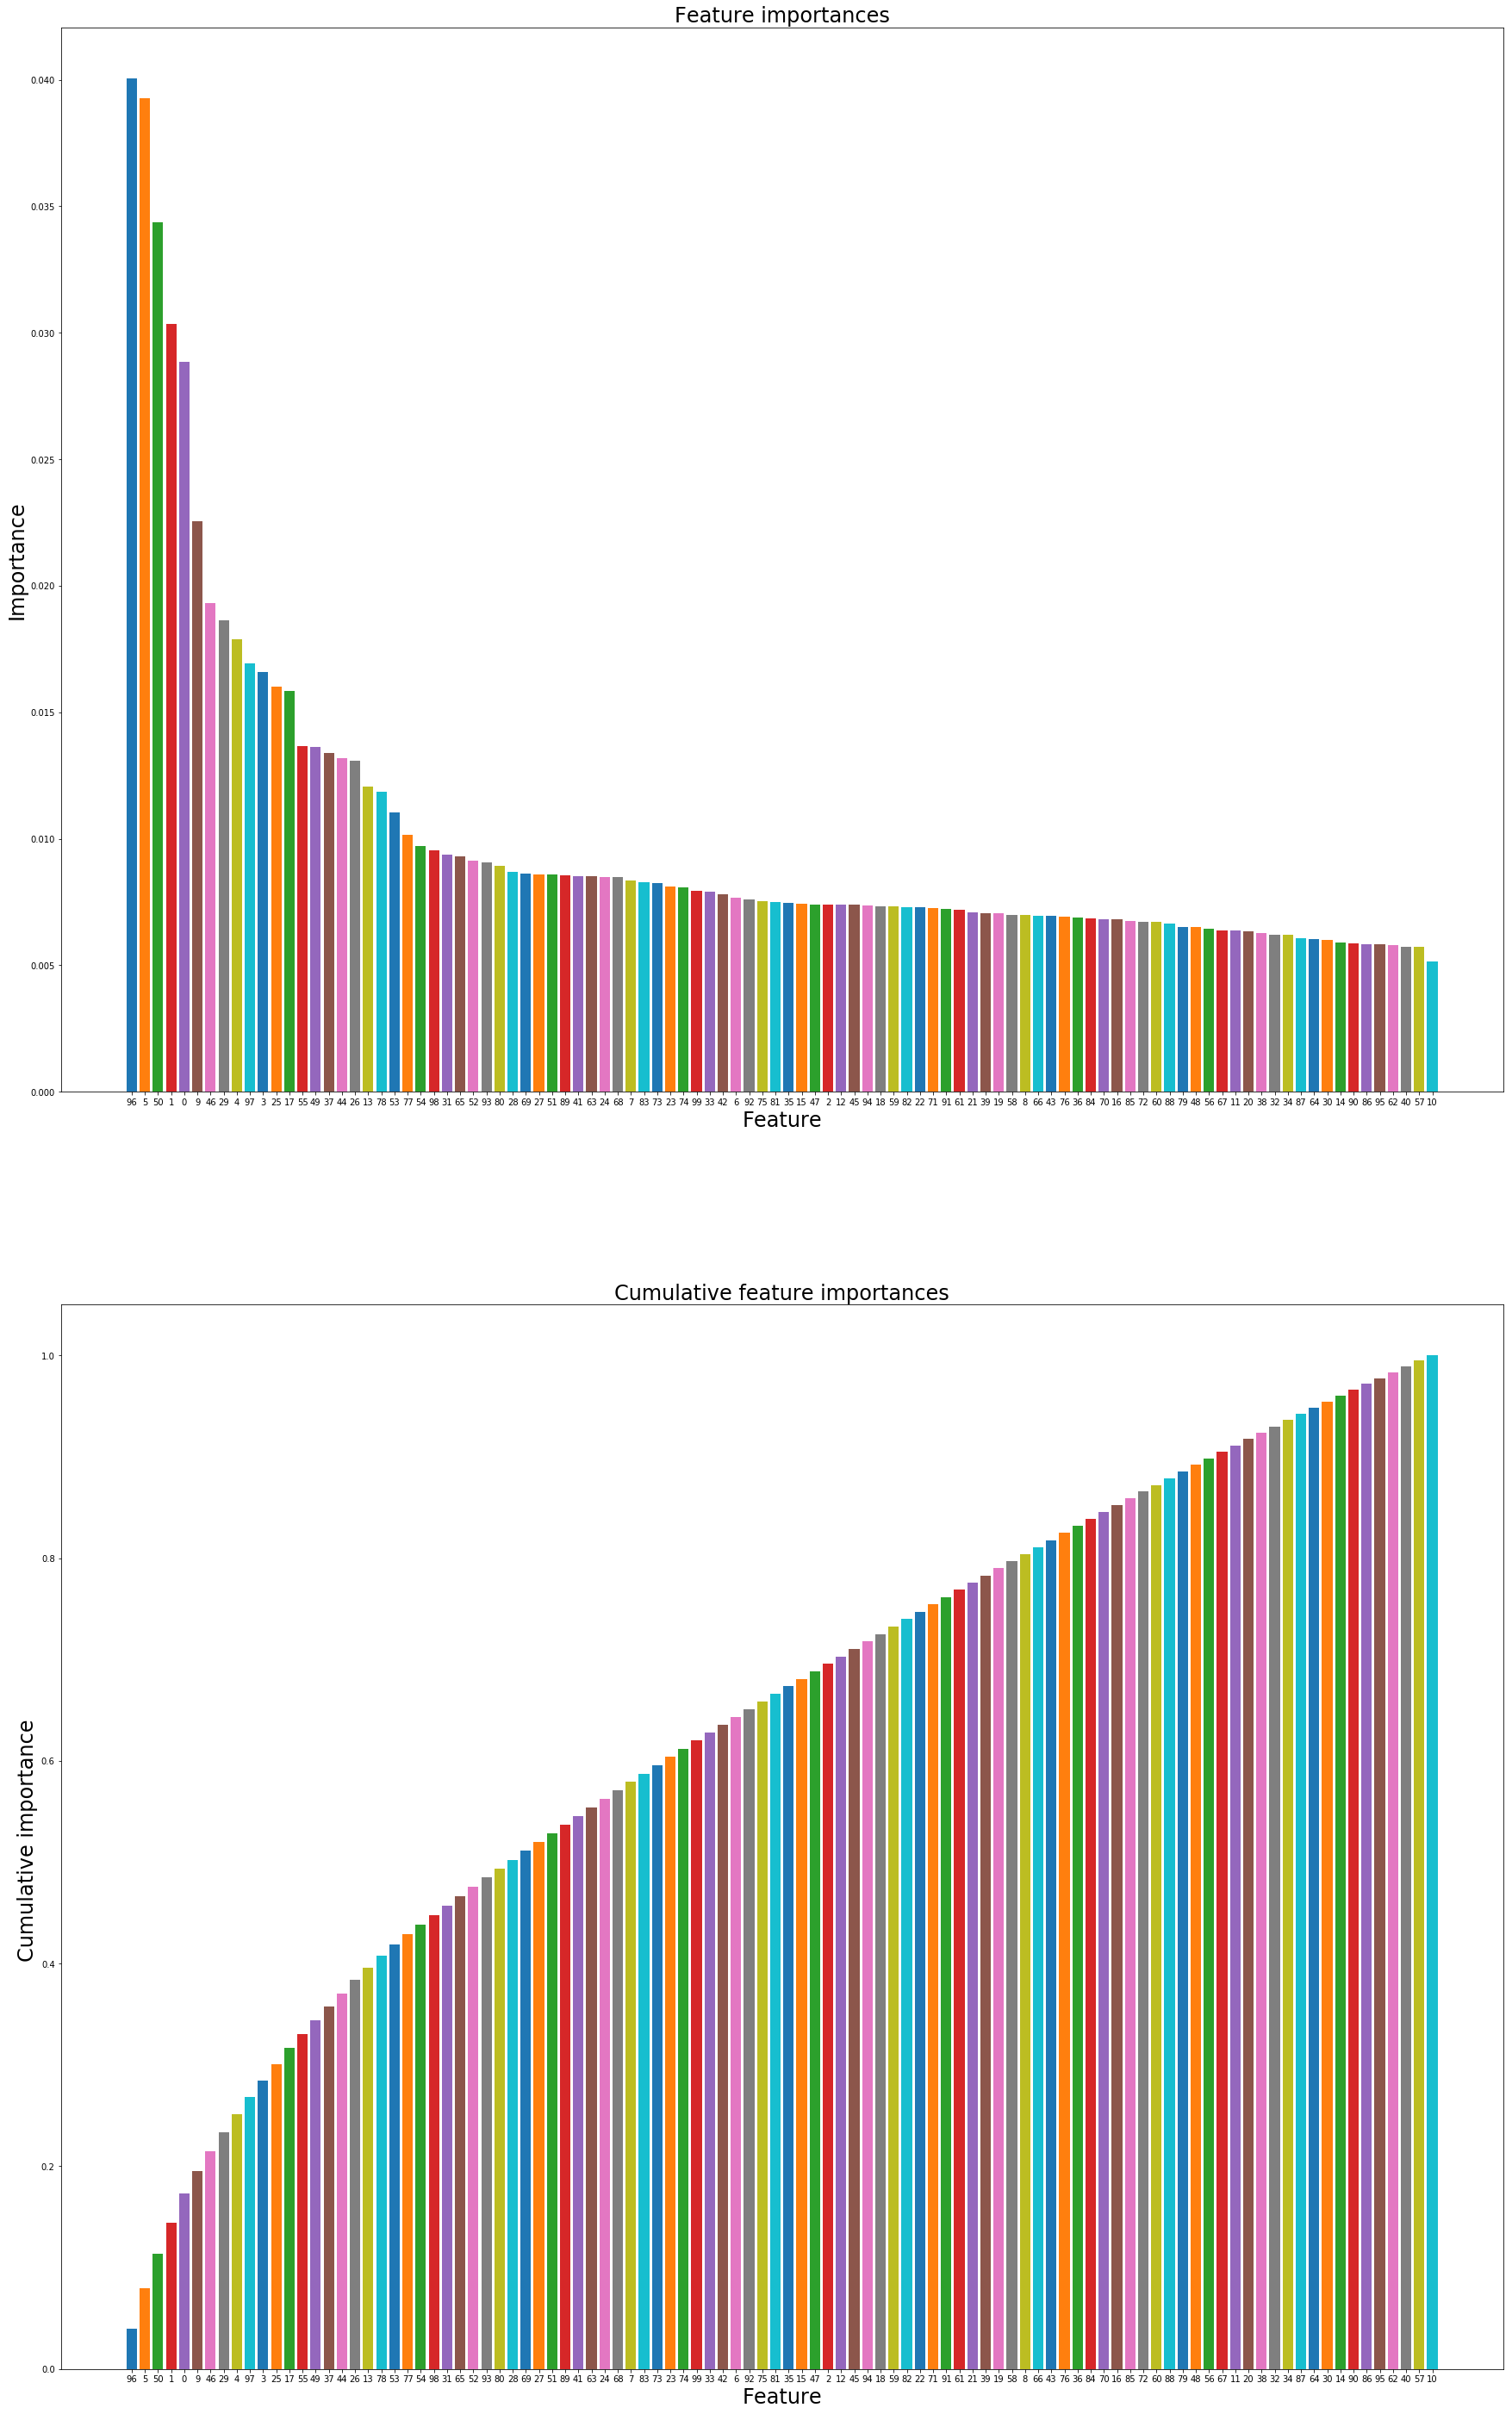

In [26]:
#importances = tree_clf.feature_importances_
#sorted_indices = np.argsort(importances)[::-1]
#sorted_importances = importances[sorted_indices]
#cumulative_importances = np.cumsum(sorted_importances)
sorted_indices, sorted_importances, cumulative_importances = \
plot_feature_importances(tree_clf, n_features = "all", return_arrays = True)

In [31]:
n_features = 6
features = sorted_indices[:n_features]
X_train_reduced, X_val_reduced, X_test_reduced = X_train[:,features], X_val[:,features], X_test[:,features]  
#tree_clf_reduced = clone(tree_clf)
tree_clf_reduced = DecisionTreeClassifier(random_state = 134)
tree_clf_reduced.fit(X_train_reduced, y_train)
y_train_pred = tree_clf_reduced.predict(X_train_reduced)
y_val_pred = tree_clf_reduced.predict(X_val_reduced)

print("training accuracy: ", accuracy_score(y_train, y_train_pred))
print("validation accuracy: ", accuracy_score(y_val, y_val_pred))



#y_train_pred = tree_clf.predict(X_train)
#y_val_pred = tree_clf.predict(X_val)

#print("training accuracy: ", accuracy_score(y_train, y_train_pred))
#print("validation accuracy: ", accuracy_score(y_val, y_val_pred))
#print("validation accuracy: ", accuracy_score(y_val, y_val_pred))

training accuracy:  0.9793875
validation accuracy:  0.5837


In [30]:
votes, elected = majority_vote(val_dataframe, y_val_pred, normalize = False)
votes_true, elected_true = majority_vote(val_dataframe, y_val, normalize = False)
print("Hamiltonian accuracy: ", accuracy_ham(elected_true, elected))

Hamiltonian accuracy:  0.88


## Random Forest


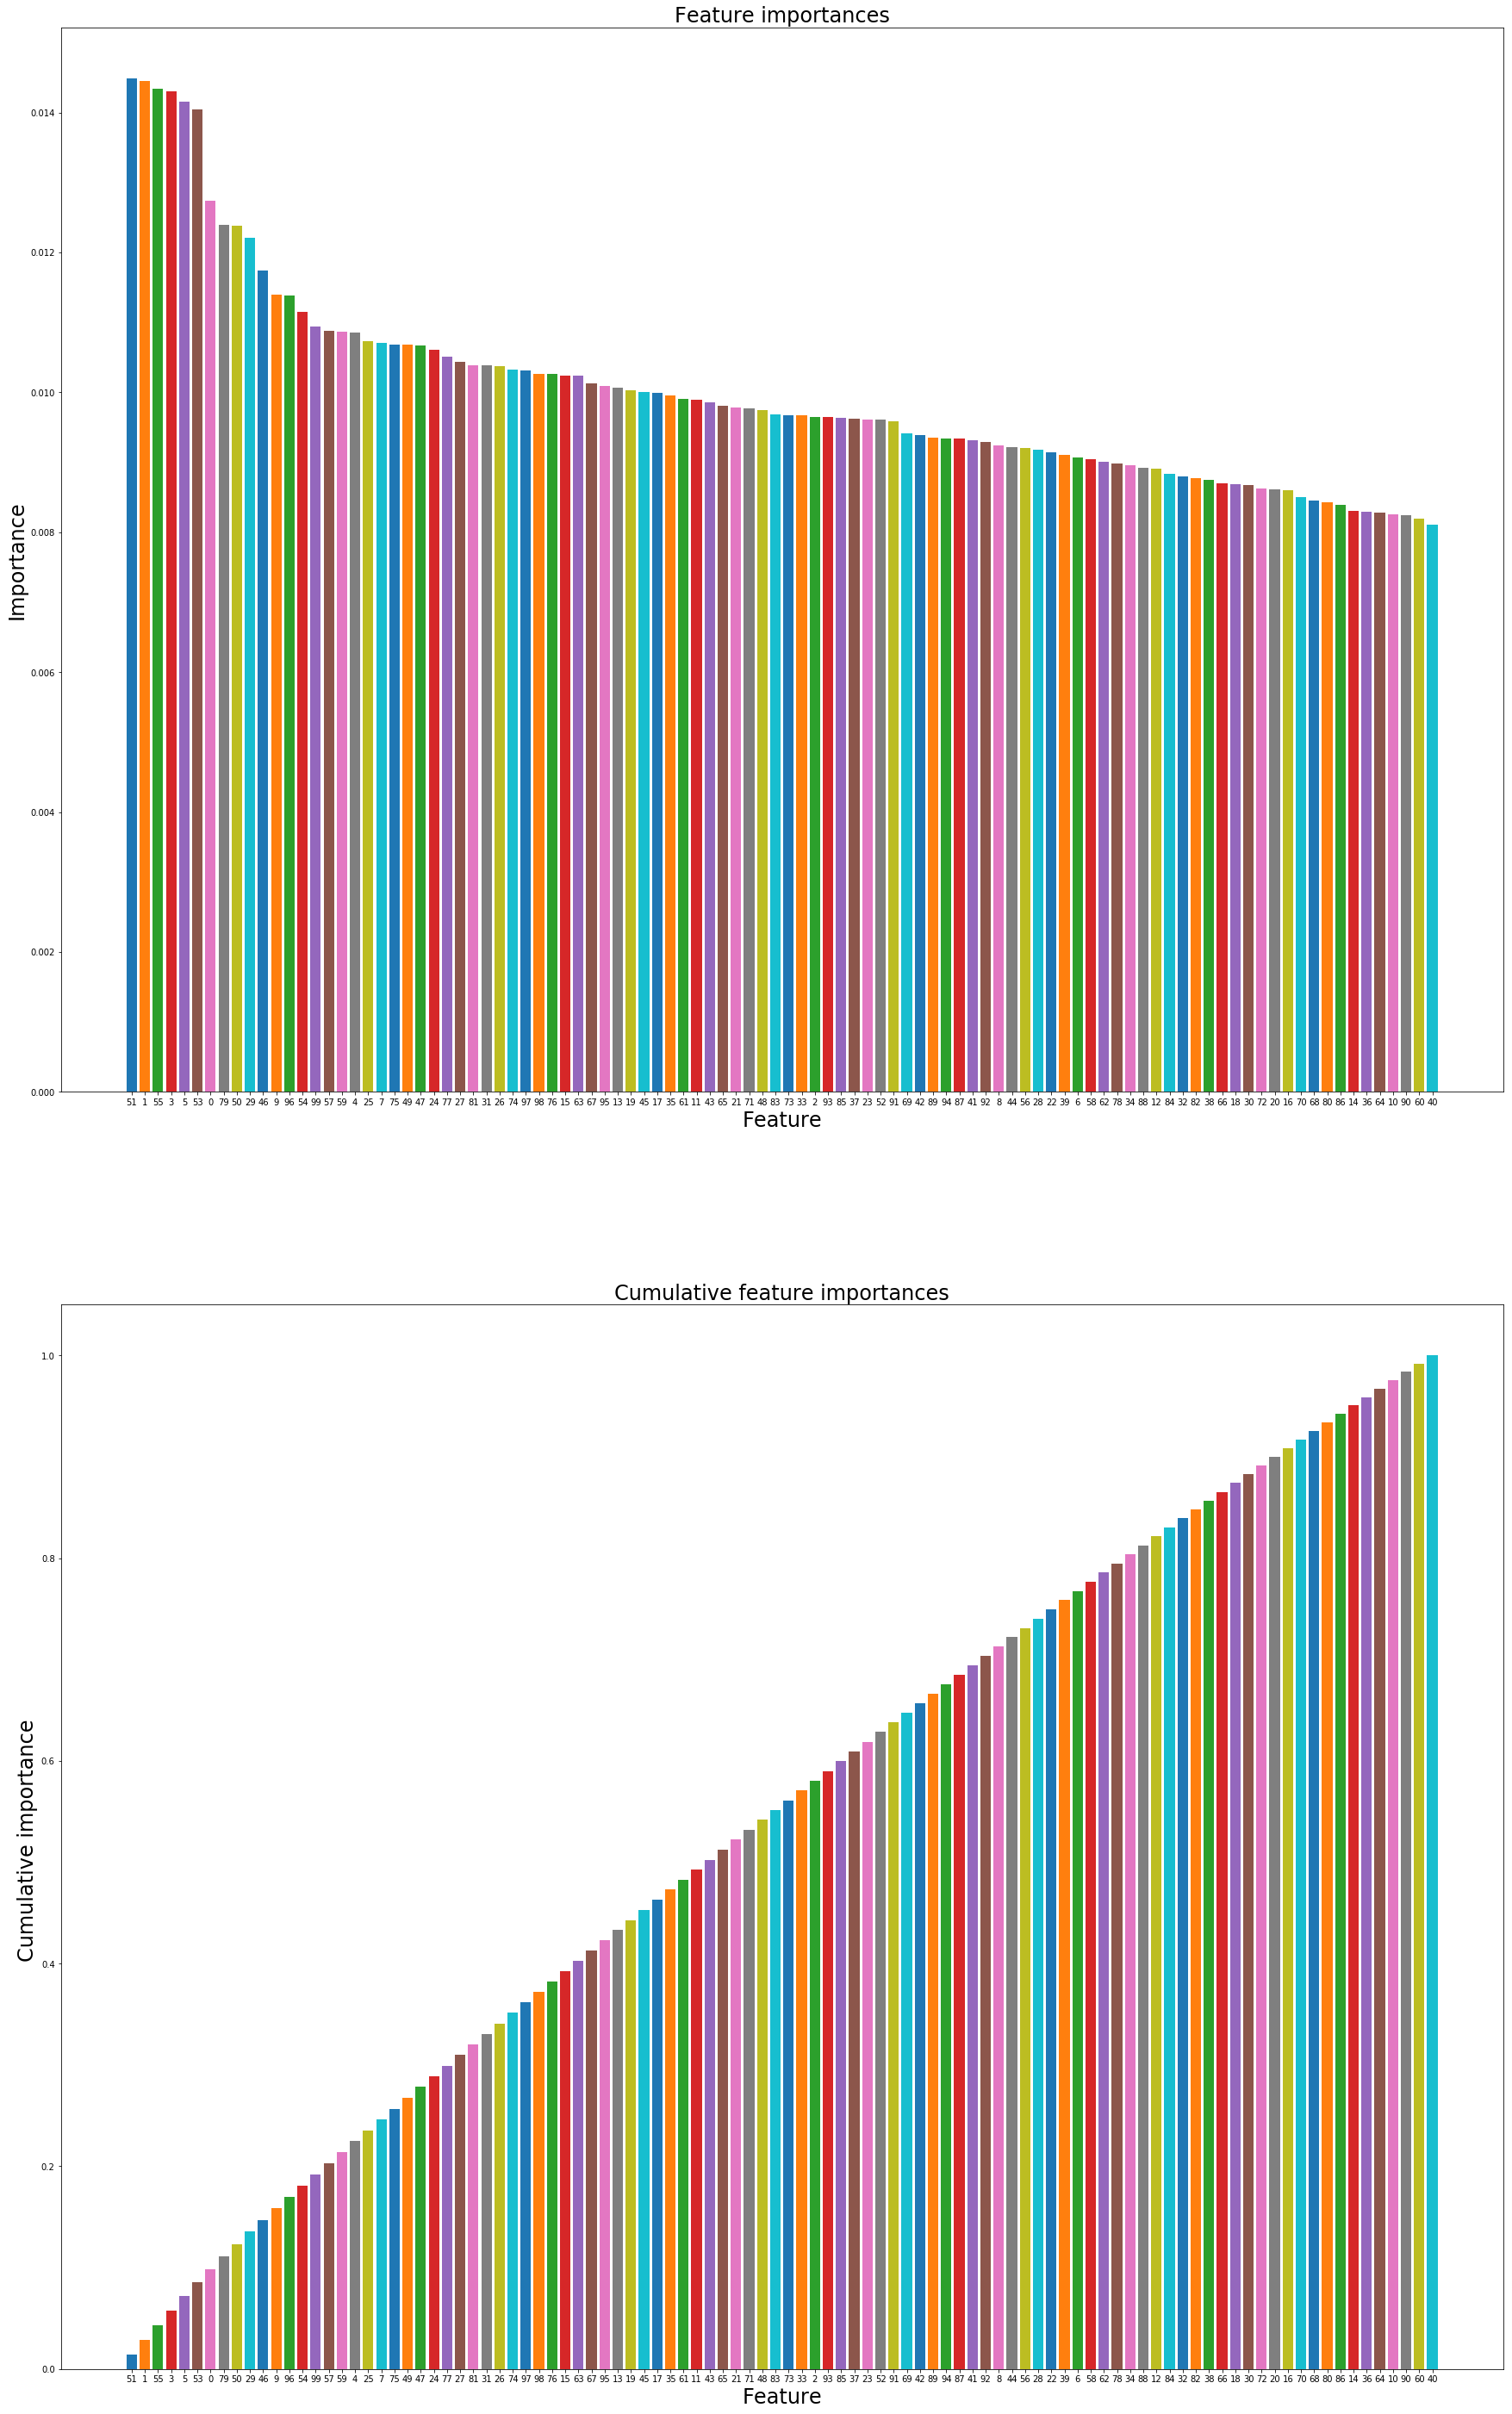

In [34]:
sorted_indices, sorted_importances, cumulative_importances = \
plot_feature_importances(forest_clf, n_features = "all", return_arrays = True)

In [37]:
n_features = 6
features = sorted_indices[:n_features]
X_train_reduced, X_val_reduced, X_test_reduced = X_train[:,features], X_val[:,features], X_test[:,features]  
#tree_clf_reduced = clone(tree_clf)
forest_clf_reduced = clone(forest_clf)
forest_clf_reduced = RandomForestClassifier(n_estimators = 100, random_state = 211)
forest_clf_reduced.fit(X_train_reduced, y_train)
y_train_pred = forest_clf_reduced.predict(X_train_reduced)
y_val_pred = forest_clf_reduced.predict(X_val_reduced)

print("training accuracy: ", accuracy_score(y_train, y_train_pred))
print("validation accuracy: ", accuracy_score(y_val, y_val_pred))


training accuracy:  0.97815
validation accuracy:  0.4415


In [38]:
tree_clf_reduced = DecisionTreeClassifier(random_state = 134)
tree_clf_reduced.fit(X_train_reduced, y_train)
y_train_pred = tree_clf_reduced.predict(X_train_reduced)
y_val_pred = tree_clf_reduced.predict(X_val_reduced)

print("training accuracy: ", accuracy_score(y_train, y_train_pred))
print("validation accuracy: ", accuracy_score(y_val, y_val_pred))


training accuracy:  0.9782875
validation accuracy:  0.4426


In [ ]:
forest_clf = RandomForestClassifier(n_estimators = 100, random_state = 101)

In [21]:
votes, elected = majority_vote(val_dataframe, y_val_pred, normalize = False)
votes_true, elected_true = majority_vote(val_dataframe, y_val, normalize = False)
print("Hamiltonian accuracy: ", accuracy_ham(elected_true, elected))

In [32]:
y_train

array([1, 2, 1, 3, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 3, 0, 0,
       1, 1, 1, 2, 1, 0, 1, 2, 1, 3, 3, 1, 1, 3, 1, 0, 1, 3, 3, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 3, 2,
       2, 0, 1, 1, 1, 2, 1, 3, 1, 3, 3, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 3, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 3, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 3, 1, 1, 2, 3, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 3, 3, 0, 2, 0, 0,
       2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 3, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3,
       1, 1, 0, 2, 1, 3, 1, 0, 0, 0, 2, 1, 1, 1, 2, 3, 2, 2, 2, 0, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 1, 0, 3, 0, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 1,
       3, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 0, 3, 1, 0, 0, 0, 2, 3, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 3, 1, 3, 1, 3,
       1, 1, 1, 3, 3, 0, 3, 3, 1, 0, 2, 3, 2, 1, 1,

In [24]:
type(X_train[2,3])

float

In [25]:
len_i = X_train.shape[0]
len_j = X_train.shape[1]
indices = []
for i in range(len_i):
    for j in range(len_j):
        if not isinstance(X_train[i,j],float):
            indices.append((i,j))
indices

[]

In [26]:
len_i = len(y_train)
indices = []
for i in range(len_i):
    if not isinstance(y_train[i], int):
        indices.append(i)
indices

[]

In [27]:
len_i

15500

In [28]:
type(y_train)

numpy.ndarray

In [10]:
a = [1,2,3,4,5]
b = [1,3,5]

In [11]:
b in a

False

In [12]:
set(b) < set(a)

True

In [52]:
votes, elected = majority_vote(val_dataframe, y_val_pred, normalize = False)
votes.head(50)

phase,0,1,2,3
hamiltonian,,,,
1,8,8,84,0
11,1,99,0,0
22,12,6,75,7
24,5,4,89,2
34,2,6,87,5
40,2,83,2,13
49,0,94,5,1
58,2,17,6,75
76,9,3,85,3


In [53]:
elected

hamiltonian
1      2
11     1
22     2
24     2
34     2
40     1
49     1
58     3
76     2
88     3
113    2
117    1
120    0
122    2
133    1
139    0
146    2
156    1
175    3
193    3
dtype: int64

In [54]:
votes_true, elected_true = majority_vote(val_dataframe, y_val, normalize = False)

In [55]:
votes_true

phase,0,1,2,3
hamiltonian,,,,
1,0,0,100,0
11,0,100,0,0
22,0,0,100,0
24,0,0,100,0
34,0,0,100,0
40,0,100,0,0
49,0,100,0,0
58,0,0,0,100
76,0,0,100,0


In [56]:
accuracy_ham(elected_true,elected)

1.0

In [57]:
from time import time
from sklearn.model_selection import GridSearchCV 

#parameters = {"criterion": ["gini", "entropy"], "max_depth": [14,16,18], "min_samples_split": [2,4,6,8], \
#              "min_samples_leaf" : [1,3,5]}
parameters = {"max_depth": [10,12,14,16,18], "min_samples_split": [2,4,6], \
              "min_samples_leaf" : [1,3,5]}

n_validation = 5

clf = DecisionTreeClassifier(random_state = 11)
grid = GridSearchCV(clf, param_grid = parameters, cv = n_validation)
t0 = time()
grid.fit(X_train, y_train)
tf = time()
elapsed_time = tf - t0
print("Elapsed time in grisearch: %d m %s s" % (elapsed_time//60, elapsed_time %60))

Elapsed time in grisearch: 6 m 2.946312189102173 s


In [58]:
best_params = grid.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [59]:
tree_params = best_params
clf = DecisionTreeClassifier(**tree_params,random_state = 11)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
print("training accuracy: ", accuracy_score(y_train, y_train_pred))
print("validation accuracy: ", accuracy_score(y_val, y_val_pred))
#print("validation accuracy: ", accuracy_score(y_val, y_val_pred))

training accuracy:  0.9386875
validation accuracy:  0.782


In [60]:
votes, elected = majority_vote(val_dataframe, y_val_pred, normalize = False)
votes_true, elected_true = majority_vote(val_dataframe, y_val, normalize = False)

In [61]:
accuracy_ham(elected_true, elected)

0.95

In [36]:
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_indices

array([98, 96, 92,  5, 94,  0, 90,  7,  3,  9, 17, 86,  1, 15,  6,  4, 88,
       13, 32, 80, 82, 53, 64, 26, 11, 51, 21, 29, 58, 66, 22, 36, 27, 55,
       24, 18, 20,  2, 76, 46, 19, 84, 33, 43, 72, 14, 48, 69, 97, 34, 10,
       40, 28, 70, 68, 16,  8, 89, 78, 59, 62, 47, 41, 57, 38, 61, 60, 63,
       52, 44, 50, 79, 23, 54, 87, 99, 67, 37, 85, 30, 25, 49, 45, 65, 12,
       74, 31, 75, 56, 71, 39, 91, 42, 35, 95, 73, 77, 81, 83, 93])

In [15]:
n_features = 4
indices = sorted_indices[:]

{16: 100,
 25: 100,
 26: 100,
 46: 100,
 48: 100,
 54: 100,
 58: 100,
 66: 100,
 74: 100,
 82: 100}

In [37]:
np.argsort(importances)

array([93, 83, 81, 77, 73, 95, 35, 42, 91, 39, 71, 56, 75, 31, 74, 12, 65,
       45, 49, 25, 30, 85, 37, 67, 99, 87, 54, 23, 79, 50, 44, 52, 63, 60,
       61, 38, 57, 41, 47, 62, 59, 78, 89,  8, 16, 68, 70, 28, 40, 10, 34,
       97, 69, 48, 14, 72, 43, 33, 84, 19, 46, 76,  2, 20, 18, 24, 55, 27,
       36, 22, 66, 58, 29, 21, 51, 11, 26, 64, 53, 82, 80, 32, 13, 88,  4,
        6, 15,  1, 86, 17,  9,  3,  7, 90,  0, 94,  5, 92, 96, 98])

In [14]:
a = np.array([1,2,3,2,1])
b = np.array(["a", "b", "c", "a", "b"])
c = pd.crosstab(a,b)
c

col_0,a,b,c
row_0,,,
1,1,1,0
2,1,1,0
3,0,0,1


In [15]:
type(c)

pandas.core.frame.DataFrame

In [ ]:
df = pd.dataframe({"a": [1,2,3,1,2,3,1,1,1,2], "b": [4,5,6,5,6,4,4,4,4,5], "c": [7,8,7,8,7,8,8,8,9,7]} )
df.

In [ ]:
print("elected_train: ", elected_train)
print("elected: ", elected_train_pred)

In [ ]:
elected_val, votes_val = majority_vote(val_dataframe, y_val)
elected_val_pred, votes_val_pred = majority_vote(val_dataframe, y_val_pred)
print("elected_val: ", elected_val)
print("\n\n")
print("elected_val_pred: ", elected_val_pred)

In [ ]:
print("votes_val: ", votes_val)
print("\n\n")
print("votes_val_pred: ", votes_val_pred)

In [1]:
feature_names = ["feat_" + str(i) for i in range(X_train.shape[1])]
class_names = [str(i) for i in range(4)]
visualize_tree(tree_clf, "first_tree", feature_names, class_names)

NameError: name 'X_train' is not defined

In [19]:
from time import time
from sklearn.model_selection import GridSearchCV 

parameters = {"criterion": ["gini", "entropy"], "max_depth": [14,16,18], "min_samples_split": [2,4,6,8], \
              "min_samples_leaf" : [1,3,5]}
n_validation = 5

clf = DecisionTreeClassifier(random_state = 11)
grid = GridSearchCV(clf, param_grid = parameters, cv = n_validation)
t0 = time()
grid.fit(X_train, y_train)
tf = time()
elapsed_time = tf - t0
print("Elapsed time in grisearch: %d m %s s" % (elapsed_time//60, elapsed_time %60))

Elapsed time in grisearch: 54 n 44.754331827163696 s


In [20]:
best_params = grid.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'max_depth': 18, 'min_samples_leaf': 1, 'criterion': 'gini', 'min_samples_split': 2}


In [34]:
tree_params = {'max_depth': 30, 'min_samples_leaf': 1, 'criterion': 'gini', 'min_samples_split': 2}
clf = DecisionTreeClassifier(**tree_params,random_state = 11)
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

In [35]:
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

print("training accuracy: ", accuracy_score(y_train, y_train_pred))
print("validation accuracy: ", accuracy_score(y_val, y_val_pred))
#print("validation accuracy: ", accuracy_score(y_val, y_val_pred))

training accuracy:  0.9995
validation accuracy:  0.598


In [38]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators = 500, random_state = 23)

forest_clf.fit(X_train, y_train)
y_train_pred = forest_clf.predict(X_train)
y_val_pred = forest_clf.predict(X_val)

print("training accuracy: ", accuracy_score(y_train, y_train_pred))
print("validation accuracy: ", accuracy_score(y_val, y_val_pred))

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


training accuracy:  1.0
validation accuracy:  0.707


In [40]:
votes, elected = majority_vote(val_dataframe, y_val_pred, normalize = False)
votes_true, elected_true = majority_vote(val_dataframe, y_val, normalize = False)
accuracy_ham(elected_true, elected)

0.9

In [41]:
votes

phase,0,1,2,3
hamiltonian,,,,
2,0,0,90,10
19,0,0,29,71
21,18,51,10,21
32,3,48,0,49
52,0,0,62,38
73,0,78,0,22
75,0,0,54,46
77,0,0,12,88
97,0,9,0,91


In [42]:
votes_true

phase,0,1,2,3
hamiltonian,,,,
2,0,0,100,0
19,0,0,0,100
21,0,100,0,0
32,0,0,0,100
52,0,0,0,100
73,0,100,0,0
75,0,0,100,0
77,0,0,0,100
97,0,0,0,100


In [ ]:
from time import time
from sklearn.model_selection import GridSearchCV

parameters = {"criterion": ["gini", "entropy"], "max_depth": [8,10,12,14,16, 18], \
              "min_samples_split": [2,4,6,8,10,12], "min_samples_leaf": [1,3,5,7,9,11]}
n_validation = 5
clf_grid = DecisionTreeClassifier(random_state = 71)
grid = GridSearchCV(clf_grid, param_grid = parameters, cv = n_validation)
t0 = time()
grid.fit(X_train, y_train)
tf = time()
elapsed_time = tf - t0
print("Elapsed time in gridsearch: %d m %d s" % ((tf - t0)//60, (tf-t0)%60 ) )

In [78]:
def f(x):
    y = x
    y[0] = 1000
    return None
x = [1,2,3]
f(x)
x
    

[1000, 2, 3]

In [10]:
os.getcwd()

'/home/linneu/Dropbox/notebooks/topological_phase/periodic'

In [13]:
hamiltonian_path = "./prototype_grid"
os.listdir(hamiltonian_path)

['H_-0.8_3.2_3.dat',
 'H_-3.2_-4_3.dat',
 'H_3.2_1.6_1.dat',
 'H_3.6_-1.6_1.dat',
 'H_1.6_-0.4_0.dat',
 'H_-0.8_-1.6_1.dat',
 'H_-4_2.8_2.dat',
 'H_0.4_1.2_0.dat',
 'H_-1.6_-0.4_1.dat',
 'H_2_0.4_1.dat',
 'H_-3.2_0_1.dat',
 'H_-2.4_-3.6_3.dat',
 'H_-1.2_-2.4_3.dat',
 'H_-2.8_3.6_2.dat',
 'H_-3.2_-3.6_1.dat',
 'H_-2.4_-2.4_1.dat',
 'H_2_-2_1.dat',
 'H_1.2_-4_3.dat',
 'H_3.2_0_1.dat',
 'H_3.6_0.8_1.dat',
 'H_2.8_-4_1.dat',
 'H_-0.8_-3.6_3.dat',
 'H_-1.2_2.8_2.dat',
 'H_-0.8_1.2_2.dat',
 'H_3.2_-3.2_1.dat',
 'H_3.2_-4_1.dat',
 'H_-2.4_-0.4_1.dat',
 'H_2.8_-2_1.dat',
 'H_-2.8_2.8_2.dat',
 'H_-2.8_2.4_2.dat',
 'H_2.4_2_1.dat',
 'H_3.6_-0.4_1.dat',
 'H_0.4_2.8_3.dat',
 'H_-2.8_-3.6_3.dat',
 'H_-3.2_-0.8_1.dat',
 'H_-4_0_1.dat',
 'H_1.6_1.6_1.dat',
 'H_1.2_-0.8_0.dat',
 'H_-2.4_2_2.dat',
 'H_-2.4_-2_1.dat',
 'H_-0.8_3.6_3.dat',
 'H_1.2_2.8_3.dat',
 'H_0_-3.6_3.dat',
 'H_2.4_-0.4_0.dat',
 'H_3.2_-0.4_1.dat',
 'H_-0.8_0.8_0.dat',
 'H_-0.4_0_0.dat',
 'H_-0.4_2_2.dat',
 'H_2.8_-1.2_1.dat',
 'H_-3

In [5]:
arr = np.arange(10)
n_reap = 5
np.repeat(arr,n_reap) 

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

In [1]:
string = 'H_-3.6_-4_1.dat'
new = string.replace("H_","").replace(".dat","").split("_")
new

['-3.6', '-4', '1']

In [10]:
"Inf" in "jahdb-Inf_-"

True

In [3]:
dic = {"a":[1.1,2.2,3.3], "b": [4.4, 5.6, 6.2] }
df = pd.DataFrame(dic)
df

,a,b
0,1.1,4.4
1,2.2,5.6
2,3.3,6.2


In [4]:
df.round()

,a,b
0,1.0,4.0
1,2.0,6.0
2,3.0,6.0


In [5]:
df

,a,b
0,1.1,4.4
1,2.2,5.6
2,3.3,6.2


In [22]:
dic1 = {"a": 1, "b": 2, "c": 3}
dic2 = {1:"a", 2: "b", 3: "c"}
{**dic1, **dic2}

{'a': 1, 'b': 2, 'c': 3, 1: 'a', 2: 'b', 3: 'c'}

In [23]:
def f(a,b,c):
    print("locals", locals())
    
f(1,2,3)


locals {'c': 3, 'b': 2, 'a': 1}


In [ ]:
def g(a,b,c):
    

In [9]:
import os

os.listdir("./results")

['abc']

In [13]:
grid_paths = "./grids/ssh_t1_t2"

grid_path.split("/")

['.', 'grids', 'ssh_t1_t2']

In [17]:
dici = {"a": 1, "b": 2, "c": 3}
import json
#json.dump(dici, "json_test")
with open("json_test", "w") as jt:
    json.dump(dici, jt)

In [10]:
dic = {"a": [(1,2), (3,4)], "b": ["apples", "oranges"]}
df = pd.DataFrame(dic)
df

,a,b
0,"(1, 2)",apples
1,"(3, 4)",oranges


In [13]:
np.array(df["a"].values)

array([(1, 2), (3, 4)], dtype=object)

In [15]:
df["a"].values.shape

(2,)

In [8]:
tree_simulation.train_dataframe.t_values.values

array([array(['-1.8', '-1.2'], dtype='<U4'),
       array(['1', '-1.1'], dtype='<U4'),
       array(['1.4', '-2'], dtype='<U4'), ...,
       array(['-0.2', '0'], dtype='<U4'),
       array(['-1.9', '1.3'], dtype='<U4'),
       array(['-1.7', '-0.4'], dtype='<U4')], dtype=object)

In [9]:
tree_simulation.train_dataframe.t_values.values.shape

(9000,)

In [10]:
arr = np.array(tree_simulation.train_dataframe.t_values.values.tolist())
arr

array([['-1.8', '-1.2'],
       ['1', '-1.1'],
       ['1.4', '-2'],
       ...,
       ['-0.2', '0'],
       ['-1.9', '1.3'],
       ['-1.7', '-0.4']], dtype='<U4')

In [11]:
arr.shape

(9000, 2)

In [11]:
dic = {"letter": ["a", "b", "a", "c", "b"], "number": [0,1,0,2,1]}
df = pd.DataFrame(dic)
df


,letter,number
0,a,0
1,b,1
2,a,0
3,c,2
4,b,1


In [15]:
df[df["letter"] == "a"].number.iloc[0]

0

In [16]:
df[df["letter"] == "a"].index

Int64Index([0, 2], dtype='int64')

In [17]:
df[df["letter"] == "a"].index.values[0]

array([0, 2])

In [17]:
a = np.arange(5)
b = np.arange(5,10)


In [18]:
a

array([0, 1, 2, 3, 4])

In [19]:
b

array([5, 6, 7, 8, 9])

In [21]:
aa, bb = np.meshgrid(a,b)

In [22]:
aa

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [23]:
bb

array([[5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9]])

In [5]:
dic = {"string": ["a","a","b","a","b","b","a","a"], "int": [0,0,1,0,1,1,0,0]}
df = pd.DataFrame(dic)

In [6]:
df

,string,int
0,a,0
1,a,0
2,b,1
3,a,0
4,b,1
5,b,1
6,a,0
7,a,0


In [7]:
df.index[df["int"]==0].values

array([0, 1, 3, 6, 7])

In [9]:
df.string[df["int"]==0].values

array(['a', 'a', 'a', 'a', 'a'], dtype=object)

In [2]:
import numpy as np
np.rint(np.inf)

inf

In [10]:
ar = np.array([-2.0,-2.0])
point = tuple(ar)

In [11]:
point

(-2.0, -2.0)

In [12]:
ar

array([-2., -2.])

In [13]:
tuple(ar) == point

True